# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Dataset California Housing

In [ ]:
ca_housing = fetch_california_housing()
features = ca_housing.data
target = ca_housing.target
col_names = ca_housing.feature_names

In [ ]:
df = pd.DataFrame(features, columns=col_names)
df = df.assign(Price=target).drop(columns=["Latitude", "Longitude"])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
MedInc,nan,nan,nan,nan,nan,nan,nan
HouseAge,-0.12,nan,nan,nan,nan,nan,nan
AveRooms,0.33,-0.15,nan,nan,nan,nan,nan
AveBedrms,-0.06,-0.08,0.85,nan,nan,nan,nan
Population,0.00,-0.30,-0.07,-0.07,nan,nan,nan
AveOccup,0.02,0.01,-0.00,-0.01,0.07,nan,nan
Price,0.69,0.11,0.15,-0.05,-0.02,-0.02,nan


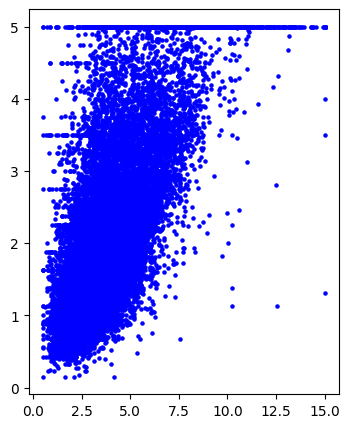

In [ ]:
f = plt.figure(figsize=(4,5))
plt.scatter(df.MedInc, df.Price, color='b', s=5)
f.show()

In [ ]:
scaler = MinMaxScaler()
medinc2d = scaler.fit_transform(features[:, [0]])
medinc = medinc2d[:,0]
medinc2d

array([[0.53966842],
       [0.53802706],
       [0.46602805],
       ...,
       [0.08276438],
       [0.09429525],
       [0.13025338]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(medinc, target, test_size=0.2, random_state=42)

# Simple Linear Regression Model Using Gradient Descent and SGD



In [ ]:
class LinearRegression:
  def __init__(self, X_train, y_train):
    self.y = y_train
    self.a = np.random.rand()
    self.X = X_train
    self.b = np.random.rand()
    self.costs = []

  def make_predictions(self, x=None):
    if x is None:
      return self.a * self.X + self.b
    else:
      return self.a * x + self.b


  def compute_cost(self, yhat):
        m = len(self.y)
        J = (1 / (2 * m)) * np.sum((yhat - self.y)**2)
        return J


  def __GD_update_coefs(self, learning_rate, yhat):
    m = len(self.X)
    self.a = self.a - learning_rate * ((1/m) * np.sum((yhat - self.y) * self.X))
    self.b = self.b - learning_rate * ((1/m) * np.sum(yhat - self.y))


  def __SGD_update_coefs(self, learning_rate):
    m = len(self.X)
    for i in range(m):
      yhat_i = self.make_predictions(self.X[i])
      self.a = self.a - learning_rate * (yhat_i - self.y[i]) * self.X[i]
      self.b = self.b - learning_rate * (yhat_i - self.y[i])


  def __plot(self, yhat):
        f = plt.figure(figsize=(4,5))
        plt.scatter(self.X, self.y, color='b', s=5)
        plt.plot(self.X, yhat, color='r')
        f.show()


  def GD_train(self, epochs=1):
    for e in range(epochs):
      yhat = self.make_predictions()
      cost = self.compute_cost(yhat)
      self.costs.append(cost)
      self.__GD_update_coefs(0.01, yhat)

      if e == epochs - 1:
        self.__plot(yhat)


  def SGD_train(self, epochs=1):
    for e in range(epochs):
      yhat = self.make_predictions()
      cost = self.compute_cost(yhat)
      self.costs.append(cost)
      self.__SGD_update_coefs(0.01)

      if e % 5000 == 0 or e == epochs-1:
        self.__plot(yhat)


## Train and test

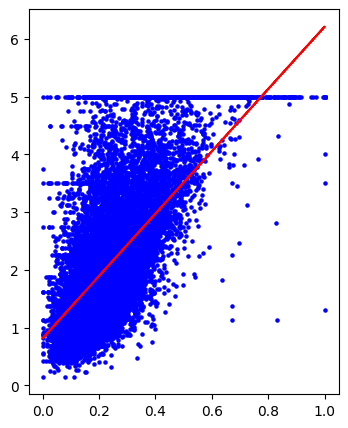

In [ ]:
model = LinearRegression(X_train, y_train)
model.GD_train(12000)

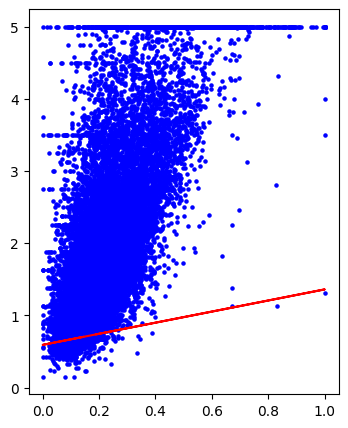

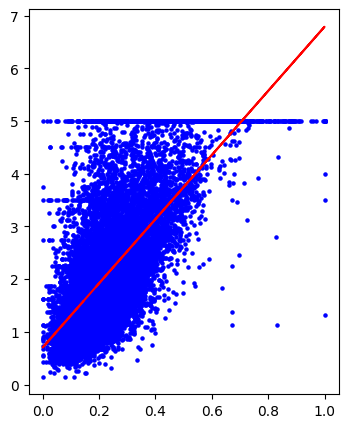

In [ ]:
model_sgd = LinearRegression(X_train, y_train)
model_sgd.SGD_train(2000)

# Multiple Linear Regression

In [ ]:
class MultipleLinearRegression:
  def __init__(self, X_train, y_train):
    self.X = X_train
    self.y = y_train
    self.__num_weights = self.X.shape[1]
    self.weights = np.zeros(self.__num_weights)
    self.b = 0
    self.costs = []

  def make_predictions(self, x=None):
    if x is None:
      return self.weights * self.X + self.b
    else:
      return self.weights * x + self.b

  def compute_cost(self, yhat):
      m = len(self.y)
      J = (1 / (2 * m)) * np.sum((yhat - self.y)**2)
      return J

  def __GD_update_coefs(self, learning_rate, yhat):
    m = len(self.X)
    for i in range(self.__num_weights):
      self.weights[i] = self.weights[i] - learning_rate * ((1/m) * np.sum((yhat - self.y) * self.X[:,i]))
    self.b = self.b - learning_rate * ((1/m) * np.sum(yhat - self.y))

  def __SGD_update_coefs(self, learning_rate):
    m = len(self.X)
    for i in range(m):
      yhat_i = self.make_predictions(self.X[i])
      for j in range(self.__num_weights):
        self.weights[j] = self.weights[j] - learning_rate * ((1/m) * np.sum((yhat_i - self.y) * self.X[:,j]))
      self.b = self.b - learning_rate * (yhat_i - self.y[i])

  def __plot(self, yhat):
    pass

  def show_expression(self):
    exp = ""
    for i in range(self.__num_weights):
      exp += f'{self.weights[i]}X{i} + '
    exp += self.b
    return exp

  def GD_train(self, epochs=1):
    self.costs = []
    for e in range(epochs):
      yhat = self.make_predictions()
      cost = self.compute_cost(yhat)
      self.costs.append(cost)
      self.__GD_update_coefs(0.01, yhat)

  def SGD_train(self, epochs=1):
    self.costs = []
    for e in range(epochs):
      yhat = self.make_predictions()
      cost = self.compute_cost(yhat)
      self.costs.append(cost)
      self.__SGD_update_coefs(0.01)